In [1]:
import pandas as pd
import oenotebook as oenb
from openeye import oechem, oeiupac

In [2]:
df = pd.read_csv('activity_coefficients.csv',sep=';')

In [3]:
# Organize solutes and solvents for representation
# select data
solu = df['SMILES_0']
solv = df['SMILES_1']

# Remove duplicates
slim = []
for elem in solu:
    if elem not in slim:
        slim.append(elem)

trim = []
for elem in solv:
    if elem not in trim:
        trim.append(elem)
        
smiles1 = []
for elem in slim:
    mol = oechem.OEMol()
    oechem.OEParseSmiles(mol, elem)
    oechem.OEAssignAromaticFlags(mol, oechem.OEAroModelOpenEye)
    oechem.OEAddExplicitHydrogens(mol)
    oechem.OETriposAtomNames(mol)
    name = oeiupac.OECreateIUPACName(mol)
    mol.SetTitle(name)
    smiles1.append(mol)
    
smiles1 = pd.DataFrame(smiles1)
smiles1.columns = ['Molecule']

smiles2 = []
for elem in trim:
    mol = oechem.OEMol()
    oechem.OEParseSmiles(mol, elem)
    oechem.OEAssignAromaticFlags(mol, oechem.OEAroModelOpenEye)
    oechem.OEAddExplicitHydrogens(mol)
    oechem.OETriposAtomNames(mol)
    name = oeiupac.OECreateIUPACName(mol)
    mol.SetTitle(name)
    smiles2.append(mol)
    
smiles2 = pd.DataFrame(smiles2)
smiles2.columns = ['Molecule']

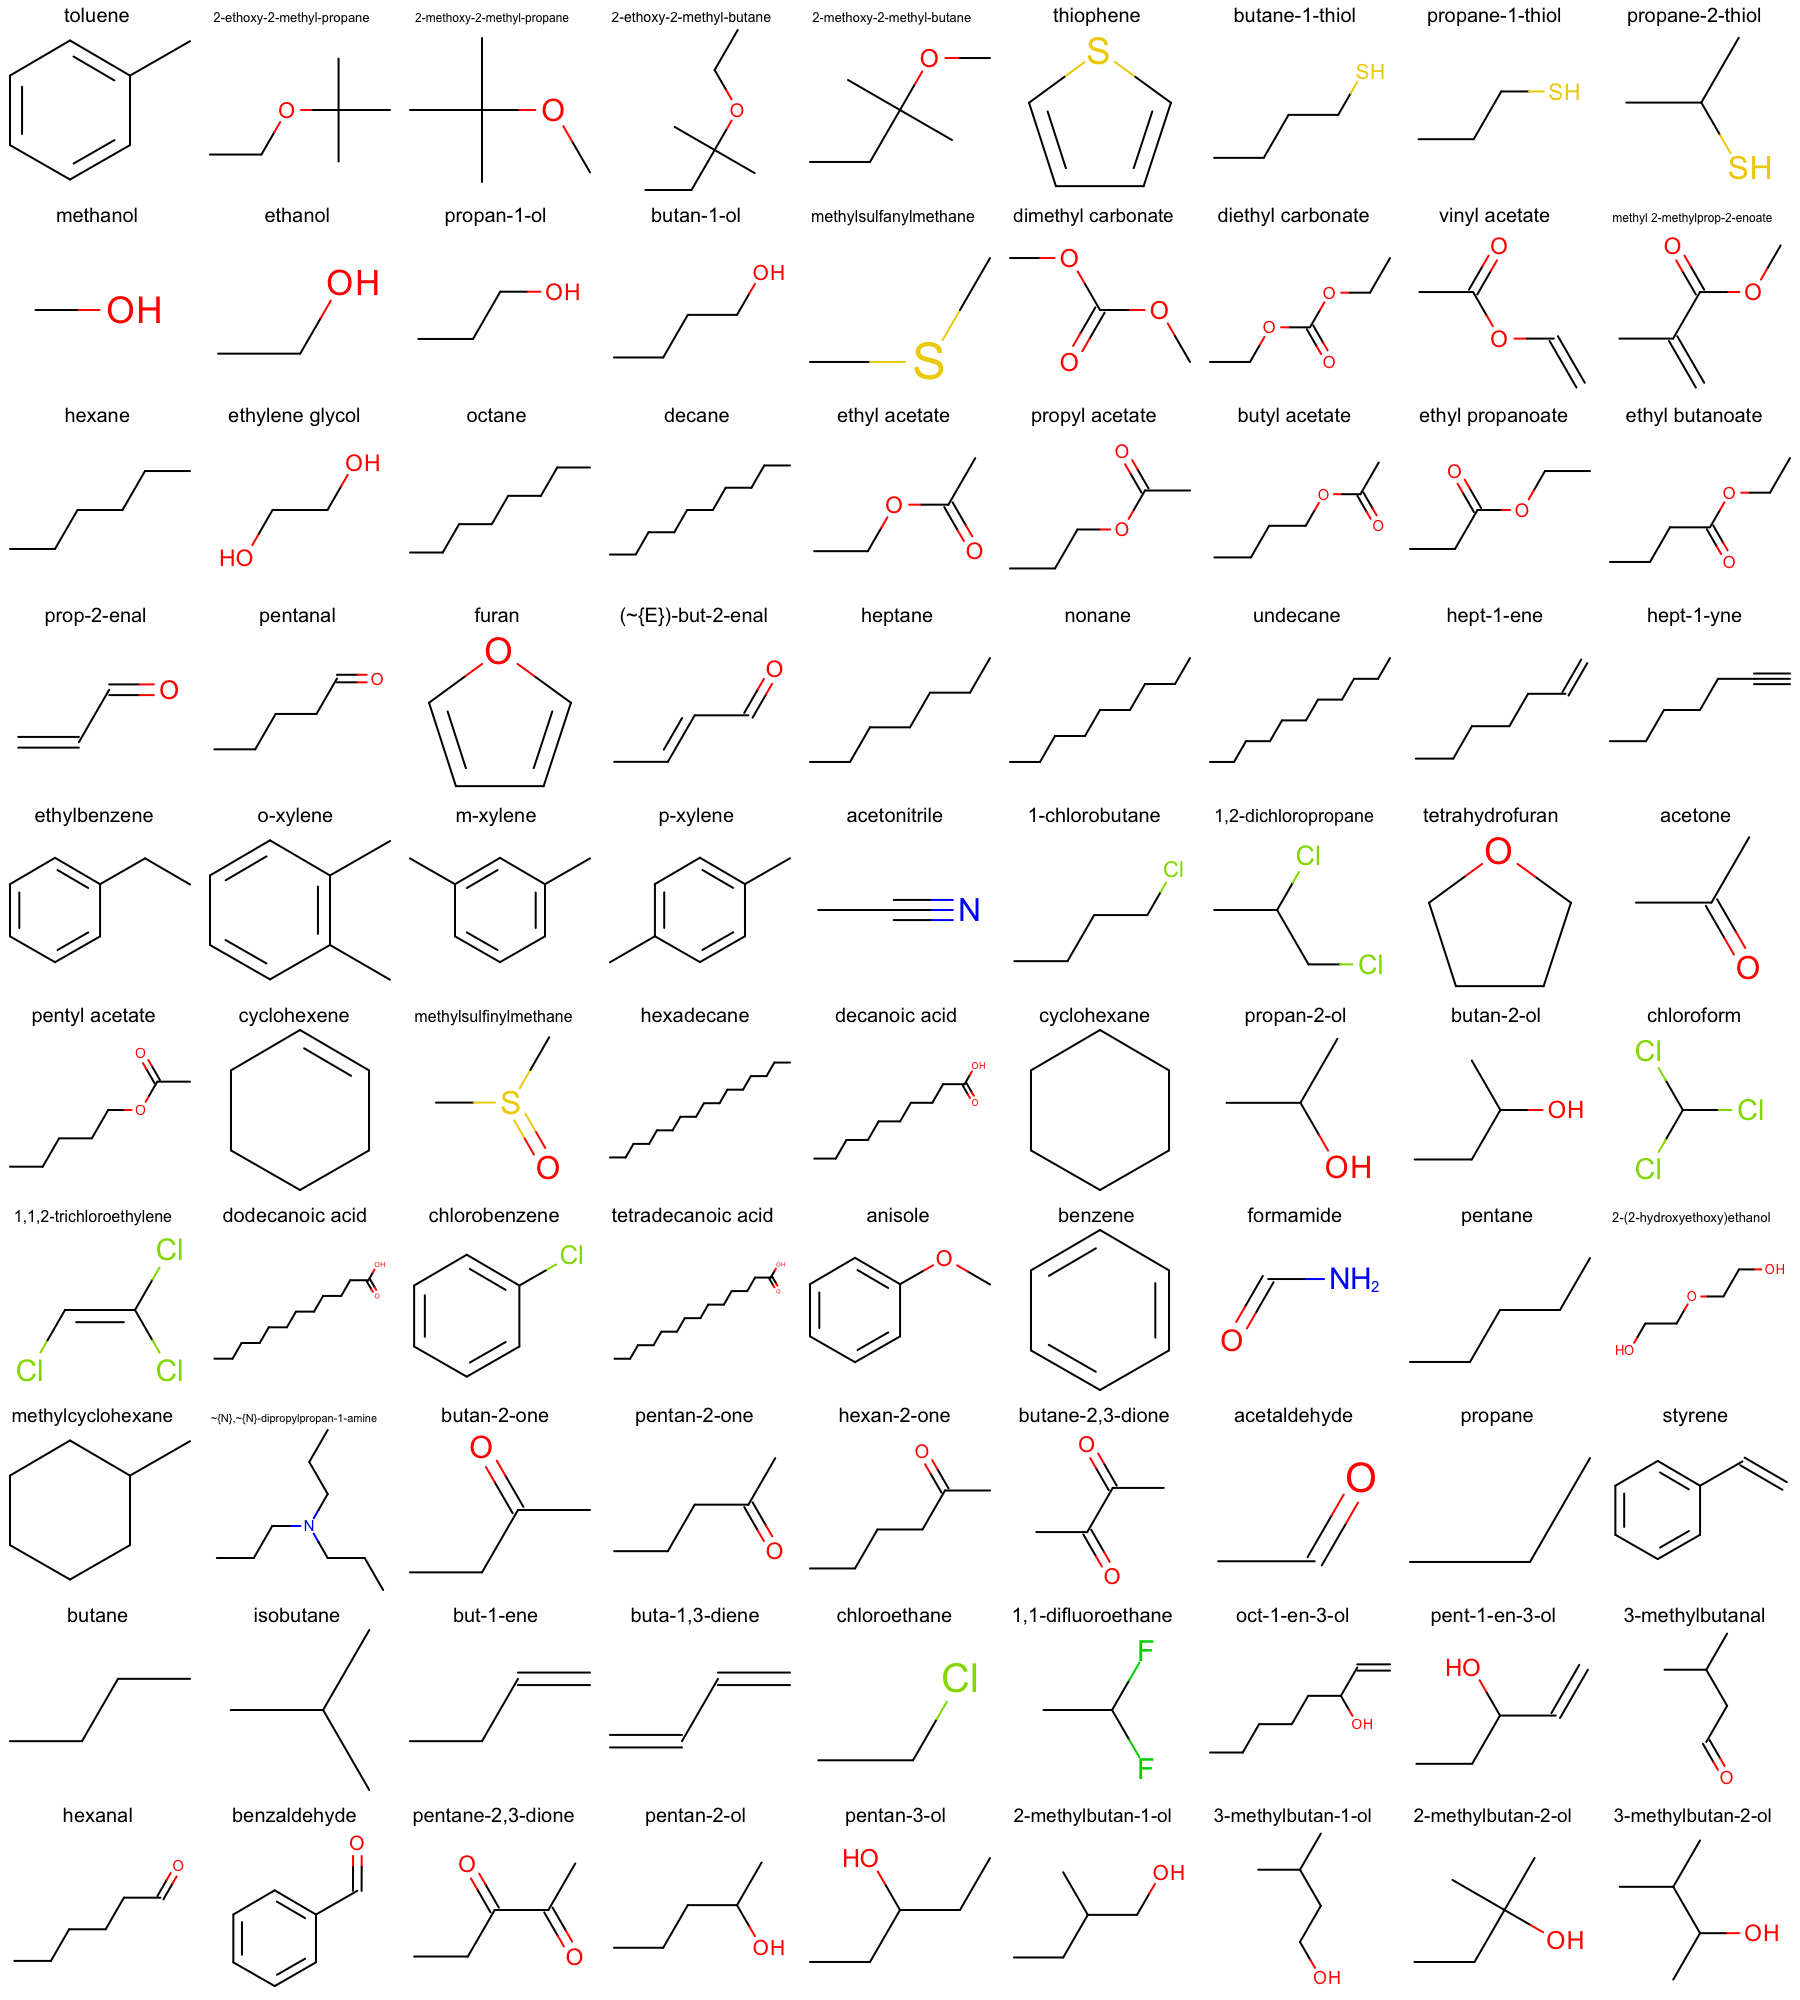

In [5]:
# Solutes
oenb.draw_mol_grid(smiles1, cols=9, rows=10)

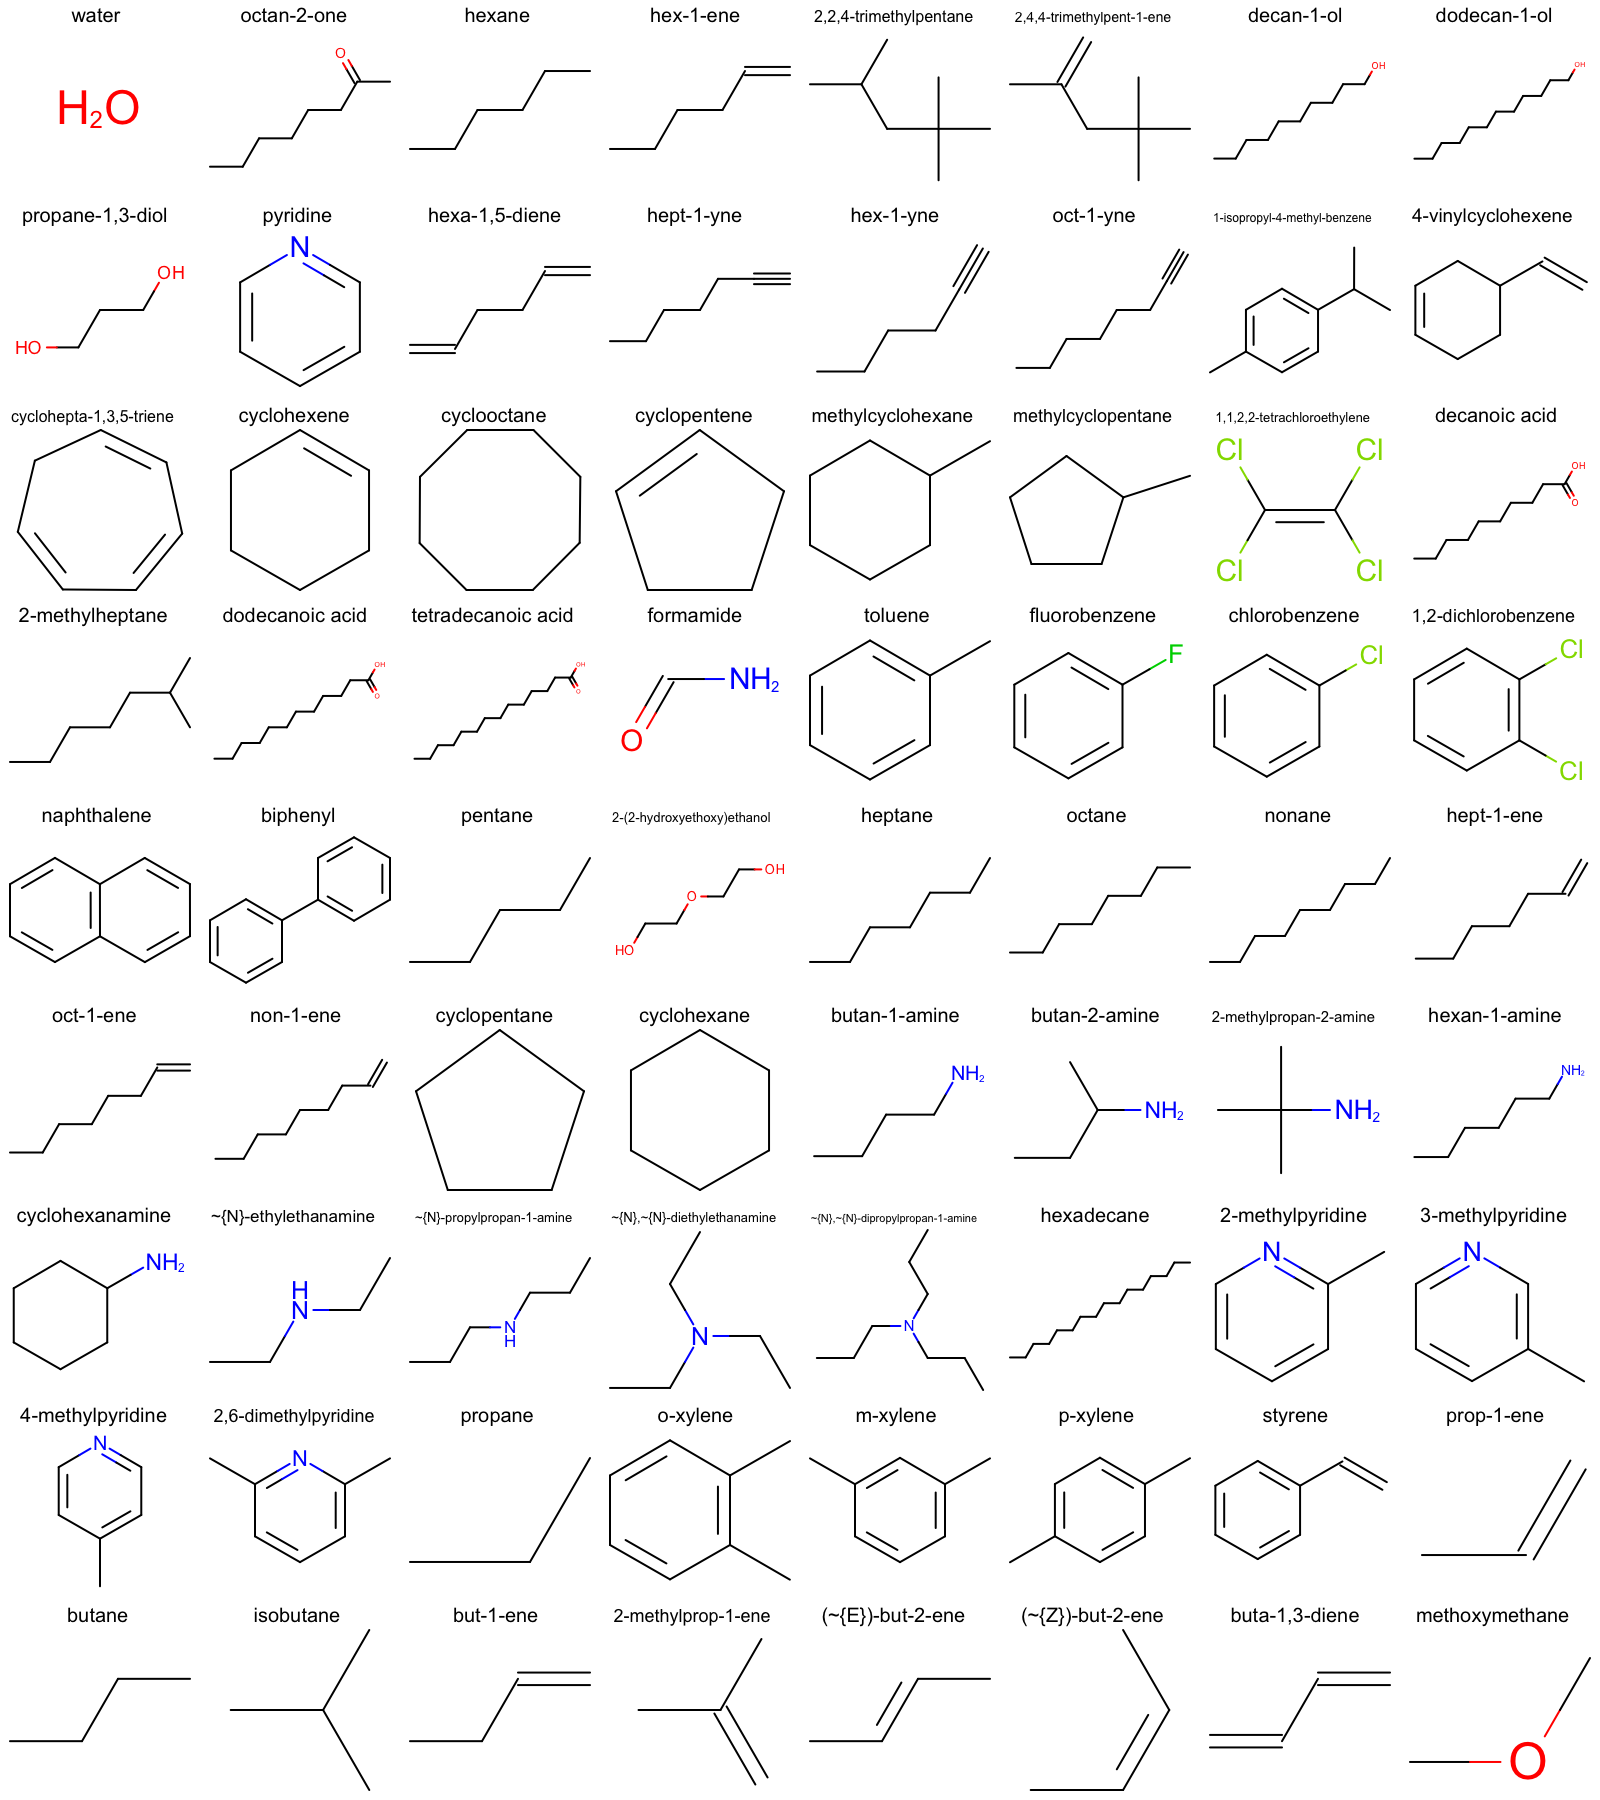

In [44]:
# Solvents (there are some repetitions)
oenb.draw_mol_grid(smiles2, cols=8, rows=9)

#### How many relative activities do I have?

In [8]:
# Columns' reference
df.columns

Index([u'Unnamed: 0', u'Activity coefficient', u'Activity coefficient_std',
       u'Mole fraction', u'Pressure, kPa', u'Temperature, K', u'components',
       u'filename', u'phase', u'n_components', u'component_0', u'component_1',
       u'formula_0', u'formula_1', u'n_atoms_0', u'n_heavy_atoms_0',
       u'n_desired_atoms_0', u'n_other_atoms_0', u'n_atoms_1',
       u'n_heavy_atoms_1', u'n_desired_atoms_1', u'n_other_atoms_1',
       u'SMILES_0', u'SMILES_1', u'cas_0', u'InChI_0', u'cas_1', u'InChI_1'],
      dtype='object')

In [48]:
# Data prep below:
# Separate pairs associated to each coefficient value
pairs = []
for i in range(len(df)):
    pair = [df.iloc[i]["component_0"],df.iloc[i]["component_1"]]
    pairs.append(pair)
    
# Create dictionary whose entries contain the associated solvents
relatives = {}
for pair in pairs:
    if pair[0] not in relatives.keys():
        relatives[pair[0]] = []
        relatives[pair[0]].append(pair[1])
    if pair[0] in relatives.keys():
        if pair[1] not in relatives[pair[0]]:
            relatives[pair[0]].append(pair[1])
        else: continue

# Create list whose elements are themselves lists 
# with a solute entry and the multiple solvents.
study_example = []
for elem in relatives.keys():
    if len(relatives[elem]) > 1:
        study_example.append([elem, relatives[elem]])
    else: continue

# Define total number of relative activities I can get
rel_activities = []
for elem in study_example:
    rel_activities.append(len(elem[1])-1)

# Create pair list (total number of simulations equals to length)
pairlist = []
for elem in study_example:
    for mol in elem[1]:
        pairlist.append([elem[0],mol])

In [55]:
from numpy import sum
# Print overall info regarding the system
print("Solute: #rel. activity coeffs.")
for idx, elem in enumerate(rel_activities):
    print("{}: {}".format(study_example[idx][0], elem))
print("Total number of solvation free energies to be run, in principle: {}".format(len(pairlist)))
print("Total number of relative activity coefficients, in principle: {}".format(sum(rel_activities)))

Solute: #rel. activity coeffs.
butan-2-ol: 2
chloroethane: 4
2-methylpropane: 4
propane: 4
2-thiapropane: 4
1,2-dimethylbenzene: 7
formamide: 5
toluene: 5
n-hexane: 2
propan-1-ol: 2
ethyl ethanoate: 3
benzene: 20
ethene, trichloro-: 2
ethylene glycol: 11
1-butanol: 3
ethanol: 1
butane: 1
1,3-dimethylbenzene: 4
ethyl alcohol: 2
2-propanol: 2
dimethyl ketone: 2
styrene: 7
1-propanol: 1
heptane: 2
diethylene glycol: 7
hexane: 2
1,3-butadiene: 1
methane, trichloro-: 2
phenylmethane: 1
capric acid: 1
methanol: 16
1,4-dimethylbenzene: 7
cyclohexane: 3
ethylbenzene: 1
dimethyl sulfoxide: 12
1-butene: 1
1,1-difluoroethane: 4
monochlorobenzene: 1
Total number of solvation free energies to be run, in principle: 197
Total number of relative activity coefficients, in principle: 159


In [ ]:
# Data prep below:
# Separate pairs associated to each coefficient value
#pairs = []
#for i in range(len(df)):
#    pair = [df.iloc[i]["component_0"],df.iloc[i]["component_1"],
#            df.iloc[i]['Activity coefficient'],df.iloc[i]['Activity coefficient_std'],
#            df.iloc[i]['Temperature, K'],df.iloc[i]['Pressure, kPa']]
#    pairs.append(pair)

dat = df[["component_0","component_1",'Activity coefficient','Activity coefficient_std','Temperature, K','Pressure, kPa']]
dat["relative_activities"] = 